In [62]:
import copy

import numpy as np
import scipy
from matplotlib import pyplot as plt

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [153]:

N0 = 100
N1 = 100
N_total = N0+N1

f_mat = np.zeros((3, N_total))
f_mat[0,:] = np.concatenate((np.random.randn(N0), np.zeros(N1)))*1
f_mat[1,:] = np.concatenate((np.zeros(N0), np.random.randn(N1)))
f_mat[2,:] = (f_mat[0,:]+f_mat[1,:])*1


In [154]:
f_mat[0,:].shape

(200,)

In [155]:
num_neurons = 3
num_dim = 3

#define random orthogonal dimensions in neural activity
Q,R = np.linalg.qr(np.random.randn(num_neurons, num_dim))

In [156]:
X = np.zeros((num_neurons,N_total))
for i in range(num_dim):
    X+= Q[:,i].reshape((-1,1))@f_mat[i,:].reshape((1,-1))


<IPython.core.display.Javascript object>


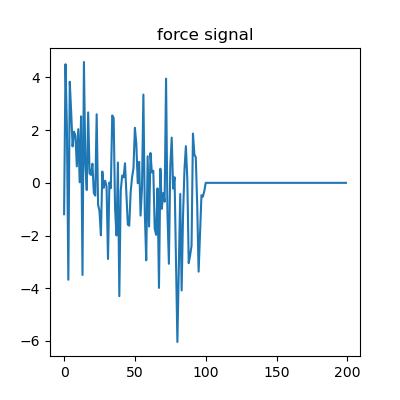

<IPython.core.display.Javascript object>


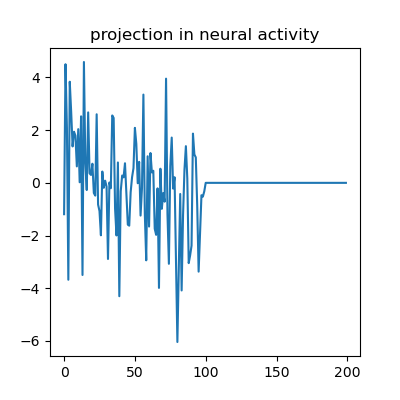

Text(0.5, 1.0, 'projection in neural activity')

In [157]:
#Verify construction of neural activity
i = 0

plt.figure(figsize=(4,4))
plt.plot(f_mat[i,:])
plt.title('force signal')

proj = Q[:,i]@X
plt.figure(figsize=(4,4))
plt.plot(proj)
plt.title('projection in neural activity')

In [158]:
np.linalg.matrix_rank(X)

2

In [159]:
#X: n_samples X n_features
#y: n_samples

y = f_mat[0,:]

# clf = LinearRegression().fit(X.T, f1_)
clf = Ridge(alpha=1e-1).fit(X.T, y)#, sample_weight=sample_weight)
# clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 5, 1e1]).fit(X.T, f1) # , sample_weight=sample_weight)
print(clf.score(X[:,N0:].T, y[N0:]))
print(clf.score(X[:,:N0].T, y[:N0]))

c0 = clf.coef_

0.0
0.999999971843333


In [160]:
#X: n_samples X n_features
#y: n_samples

y = f_mat[1,:]

# clf = LinearRegression().fit(X.T, f1_)
clf = Ridge(alpha=1e-1).fit(X.T, y)#, sample_weight=sample_weight)
# clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 5, 1e1]).fit(X.T, f1) # , sample_weight=sample_weight)
print(clf.score(X[:,N0:].T, y[N0:]))
print(clf.score(X[:,:N0].T, y[:N0]))

c1 = clf.coef_

0.9999994008226529
0.0


In [161]:
c0_n = c0/np.linalg.norm(c0)
c1_n = c1/np.linalg.norm(c1)
c0_n@c1_n

-0.49964701673347195

In [162]:
print(c0_n.shape)

(3,)


In [163]:
model_angle = scipy.linalg.subspace_angles(c0_n.reshape((-1,1)), c1_n.reshape((-1,1)))[0]*180/np.pi
model_angle

60.02335043846399

In [164]:
# np.linalg.norm(np.array((-.41, .816, .41)))

In [165]:
label_list = ['Model B Projection on Action A dimension', 'Model B Projection on Action B dimension', 'Model B Projection on General-Force dimension']
for i in range(num_dim):
    print(label_list[i])
    print(c1_n@Q[:,i])
    print('')

Model B Projection on Action A dimension
-0.40819705242105253

Model B Projection on Action B dimension
0.8164965787843842

Model B Projection on General-Force dimension
0.40829952636288985



In [166]:
label_list = ['Model A Projection on Action A dimension', 'Model A Projection on Action B dimension', 'Model A Projection on General-Force dimension']

for i in range(num_dim):
    print(label_list[i])
    print(c0_n@Q[:,i])
    print('')

Model A Projection on Action A dimension
0.8164965350892449

Model A Projection on Action B dimension
-0.4080113287854529

Model A Projection on General-Force dimension
0.4084852063049366



### Test:

In [58]:
tmp0 = np.array((-0.33, 0.66, 0.33))
tmp0 = tmp0/np.linalg.norm(tmp0)

tmp1 = np.array((0.66, -0.33, 0.33))
tmp1 = tmp1/np.linalg.norm(tmp1)

In [59]:
tmp1@tmp2

0.8083316151184488

In [58]:
# clf = Ridge(alpha=C, max_iter=max_iter).fit(D['x', tt], D['y', tt])

In [14]:
# plt.figure()
# plt.hist(f1)